### Isolation Forest Example

Example courtesy of https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest
plt.style.use('seaborn-whitegrid')

In [60]:
# Generating data ----

rng = np.random.RandomState(42)

# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

X_train['type']=3
X_test['type']=2
X_outliers['type']=1
x_plot = X_train.append(X_test).append(X_outliers)

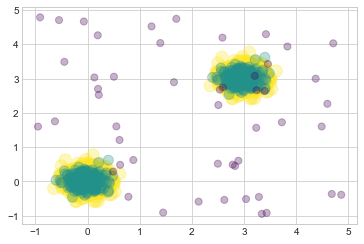

In [61]:
plt.scatter(x_plot['x1'], x_plot['x2'], c=x_plot['type'], s=x_plot['type']*50,alpha=0.3,cmap='viridis')

In [65]:
# Isolation Forest ----

# training the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)

# predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

X_train['type']=y_pred_train+2.0
X_test['type']=y_pred_test+2.0
X_outliers['type']=y_pred_outliers+2.0
x_plot2 = X_train.append(X_test).append(X_outliers)

In [66]:
# new, 'normal' observations ----
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])

print("Accuracy:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

Accuracy: 0.92
Accuracy: 0.98


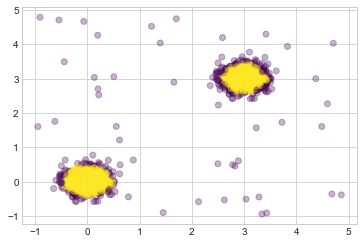

In [67]:
plt.scatter(x_plot2['x1'], x_plot2['x2'], c=x_plot2['type'],alpha=0.3,cmap='viridis')